## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

In [78]:
# Use this cell to begin your analysis, and add as many as you would like!
#import packages
import pandas as pd
import matplotlib.pyplot as plt

#Get the csv file 
data=pd.read_csv('datasets/office_episodes.csv')
print(data.head())


   episode_number  season  episode_title  \
0               0       1          Pilot   
1               1       1  Diversity Day   
2               2       1    Health Care   
3               3       1   The Alliance   
4               4       1     Basketball   

                                         description  ratings  votes  \
0  The premiere episode introduces the boss and s...      7.5   4936   
1  Michael's off color remark puts a sensitivity ...      8.3   4801   
2  Michael leaves Dwight in charge of picking the...      7.8   4024   
3  Just for a laugh, Jim agrees to an alliance wi...      8.1   3915   
4  Michael and his staff challenge the warehouse ...      8.4   4294   

   viewership_mil  duration release_date guest_stars         director  \
0            11.2        23   2005-03-24         NaN       Ken Kwapis   
1             6.0        23   2005-03-29         NaN       Ken Kwapis   
2             5.8        22   2005-04-05         NaN  Ken Whittingham   
3         

In [79]:
#Creating the colors for the plot
colors = []

for i, row in data.iterrows():
    if row['scaled_ratings'] < 0.25:
        colors.append("red")
    elif (0.25 <= row['scaled_ratings'] and row['scaled_ratings']< 0.50):
        colors.append("orange")
    elif (0.50 <= row['scaled_ratings'] and row['scaled_ratings']< 0.75):
        colors.append("lightgreen")
    else:
        colors.append("darkgreen")

# display the first 10 values of colors    
print(colors[:20])

['orange', 'lightgreen', 'orange', 'orange', 'lightgreen', 'orange', 'lightgreen', 'orange', 'lightgreen', 'lightgreen', 'orange', 'orange', 'lightgreen', 'orange', 'lightgreen', 'lightgreen', 'lightgreen', 'darkgreen', 'lightgreen', 'orange']


In [80]:
#Sizing system
size_sys= []

for i, row in data.iterrows():
    if row['has_guests'] == True:
        size_sys.append(250)
    else:
        size_sys.append(25)

print(size_sys[:20]) 

[25, 25, 25, 25, 25, 250, 25, 25, 250, 250, 25, 25, 250, 25, 250, 25, 250, 25, 25, 25]


<Figure size 792x504 with 0 Axes>

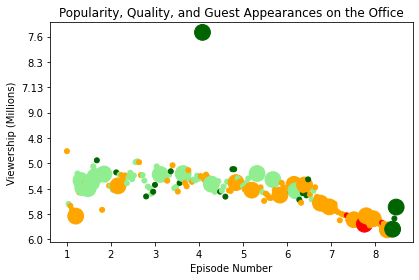

In [81]:
#intialize figure
fig = plt.figure(figsize=(11,7))
fig, ax = plt.subplots()
#create scatter plot
ax.scatter(data['episode_number'],data['viewership_mil'], c=colors, s=size_sys)
ax.set_xticklabels(data['episode_number'])
ax.set_yticklabels(data['viewership_mil'])
#title and labels
ax.set_title("Popularity, Quality, and Guest Appearances on the Office")
ax.set_xlabel("Episode Number")
ax.set_ylabel("Viewership (Millions)")
plt.show()

In [82]:
#The guest star in the most watched episode
max_viewers = max(data["viewership_mil"])

max_viewed = data.loc[data["viewership_mil"] == max_viewers]


top_stars = max_viewed[["guest_stars"]]
print(top_stars)


                                  guest_stars
77  Cloris Leachman, Jack Black, Jessica Alba


In [83]:
top_star='Jack Black'
print(top_star)

Jack Black
